DATA LOADING

In [4]:
import pandas as pd

In [6]:
df=pd.read_csv("C:\\Users\\sivas\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\FuelConsumptionCo2.csv")

In [7]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


DATA EXPLORATION

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
c=df[['ENGINESIZE',	'CYLINDERS',	'FUELCONSUMPTION_CITY',	'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
c.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


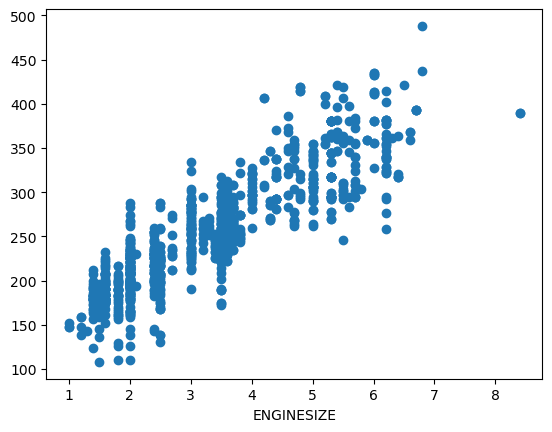

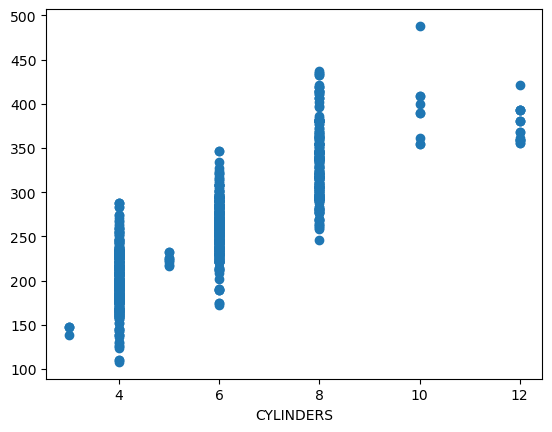

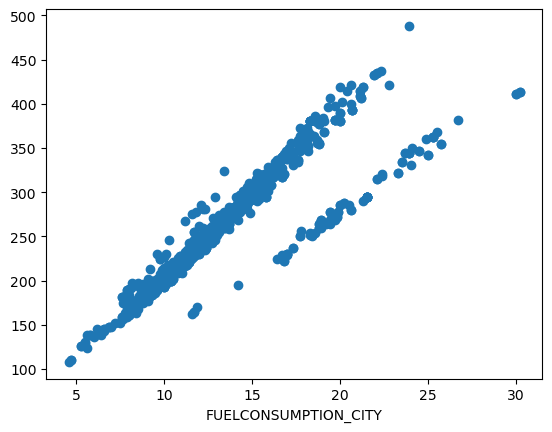

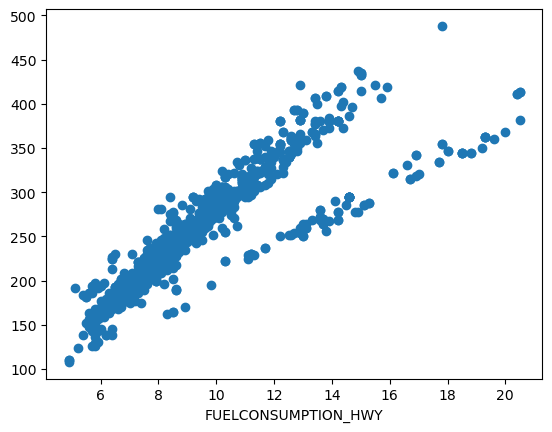

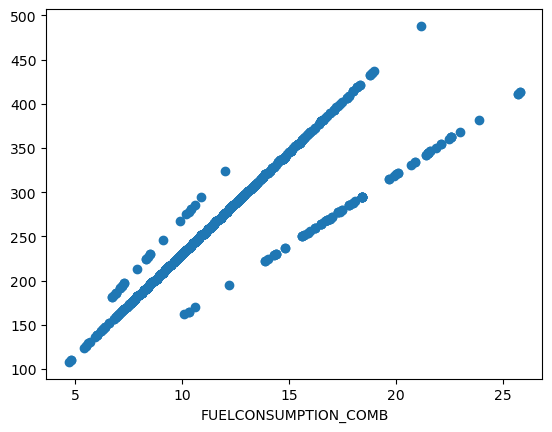

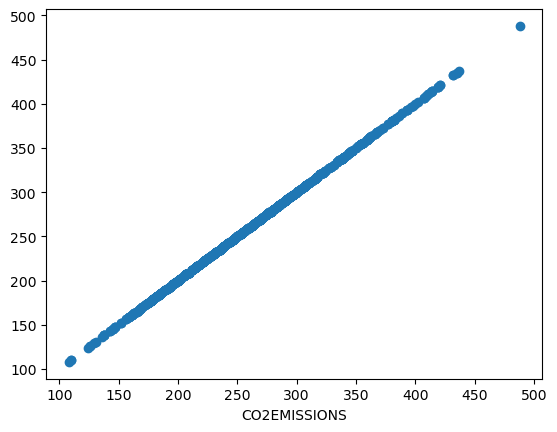

In [11]:
import matplotlib.pyplot as plt
for i in c:
    plt.scatter(df[i],df['CO2EMISSIONS'])
    plt.xlabel(i)
    plt.show()

In [12]:
import numpy as np
msk=np.random.rand(len(df))<0.8
train=c[msk]
test=c[~msk]

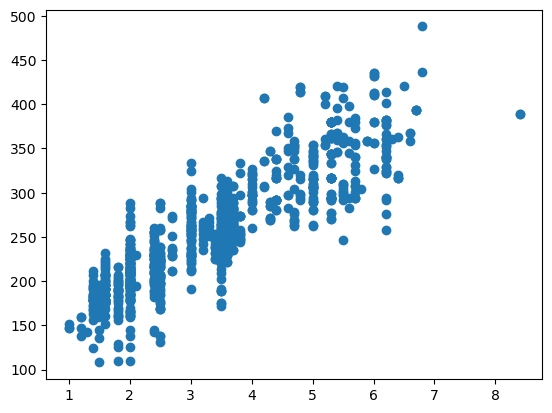

In [13]:
plt.scatter(c.ENGINESIZE,c.CO2EMISSIONS)

# MULTIPLE LINEAR REGRESSION

In [15]:
from sklearn import linear_model
model=linear_model.LinearRegression()
x =np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y =np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x,y)
print(model.coef_)

[[11.07935202  7.32804641  9.82463645]]


In [16]:
# fitted without feature names only like(x,y)   

In [17]:
#yhat=model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
yyyy=model.predict(x)
print("MSE : %.2f"
      % np.mean((yyyy-y)**2))
print('var %.2f' % model.score(x,y))

MSE : 617.83
var 0.85


In [18]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x,y)
print(model.coef_)

[[11.17295759  7.04379597  6.08876448  3.5106885 ]]


In [19]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
yyyy=model.predict(x)


MODEL EVALUATION

In [20]:
# variance 1 is good lower than 1 is worse (variance score/model score)

In [21]:
print("MSE : %.2f"
      % np.mean((yyyy-y)**2))
print('var %.2f' % model.score(x,y))

MSE : 614.73
var 0.85
